Name: Doga Yalcin
<br>
ID: 191101054
<br>
Course: BIL470

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from dt import DecisionTreeClassifier

# Exploratory Data Analysis (EDA)

### Read DataSet

In [2]:
iris = pd.read_csv(r'Iris.csv')
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### Info

In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Data Types

In [4]:
iris.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

### Modify DataSet

In [5]:
# Remove Id cloumn
iris = iris.drop(columns="Id")
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
# Change Species data types to integers
iris["Species"] = iris["Species"].replace({"Iris-setosa": "0", "Iris-versicolor": "1", "Iris-virginica": "2"})
iris['Species'] = iris['Species'].astype(int)
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### DataSet Summary

#### DataSet Feautures

In [7]:
# SepalLengthCm
iris["SepalLengthCm"].describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: SepalLengthCm, dtype: float64

In [8]:
# SepalWidthCm
iris["SepalWidthCm"].describe()

count    150.000000
mean       3.054000
std        0.433594
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: SepalWidthCm, dtype: float64

In [9]:
# PetalLengthCm
iris["PetalLengthCm"].describe()

count    150.000000
mean       3.758667
std        1.764420
min        1.000000
25%        1.600000
50%        4.350000
75%        5.100000
max        6.900000
Name: PetalLengthCm, dtype: float64

In [10]:
# PetalWidthCm
iris["PetalLengthCm"].describe()

count    150.000000
mean       3.758667
std        1.764420
min        1.000000
25%        1.600000
50%        4.350000
75%        5.100000
max        6.900000
Name: PetalLengthCm, dtype: float64

#### Duplicated Data

In [11]:
iris.duplicated().sum()

3

#### Distiribution

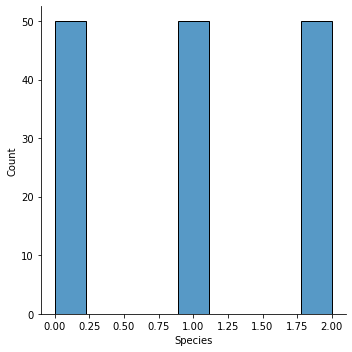

In [12]:
sns.displot(iris["Species"])

DataSet is balanced, [50,50,50]

### Correlation Matrix

In [13]:
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


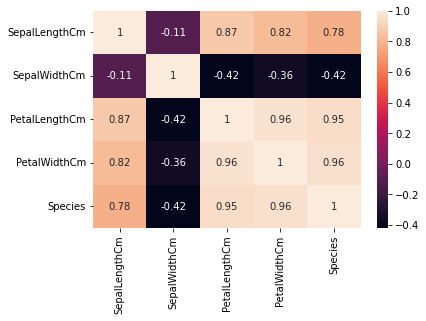

In [14]:
heatmap = sns.heatmap(iris.corr(),annot=True)

### Pair-Plot

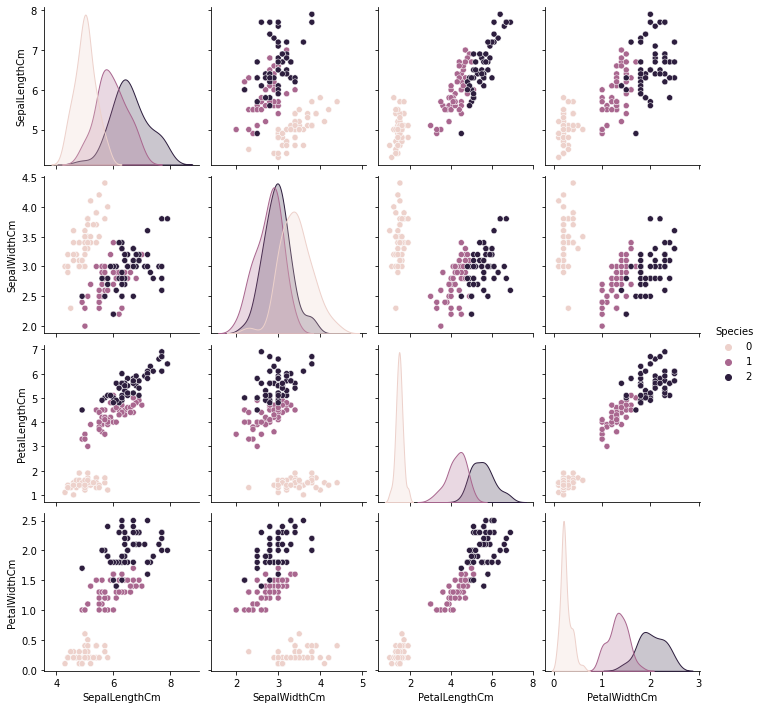

In [15]:
sns.pairplot(iris, hue="Species")
plt.show()

# Train the classifier

In [16]:
clf = DecisionTreeClassifier(max_depth=5)

#### Split dataset to train and test

In [17]:
X=iris.values.tolist();
y=[];
for row in X:
    y.append(int(row[4]));
    del row[4];
X=pd.Series(X);
y=pd.Series(y);
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True);

X_train_list=X_train.values.tolist();
y_train_list=y_train.values.tolist();
X_test_list=X_test.values.tolist();
y_test_list=y_test.values.tolist();

### Train The Classifier

In [18]:
clf.fit(X_train_list,y_train_list);

### Predict Class of Test values

In [19]:
yhat = clf.predict(X_test_list)
print("Test Features Expected Classification")
print(y_test_list)
print("Prediction")
print(yhat);
xhat = clf.predict(X_train_list)
print("Train Features Expected Classification")
print(y_train_list)
print("Prediction")
print(xhat);

Test Features Expected Classification
[2, 1, 1, 2, 2, 0, 2, 0, 1, 0, 0, 0, 2, 2, 0, 1, 0, 0, 2, 0, 2, 0, 0, 0, 1, 2, 0, 0, 2, 0]
Prediction
[2, 2, 1, 2, 2, 0, 2, 0, 1, 0, 0, 0, 2, 2, 0, 1, 0, 0, 2, 0, 2, 0, 0, 0, 1, 2, 0, 0, 2, 0]
Train Features Expected Classification
[2, 2, 0, 0, 0, 1, 0, 1, 2, 2, 2, 2, 1, 0, 1, 2, 2, 2, 1, 0, 1, 0, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 1, 1, 2, 1, 2, 0, 1, 1, 0, 2, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2, 2, 1, 0, 2, 0, 1, 1, 2, 2, 0, 2, 1, 1, 0, 2, 0, 1, 0, 2, 1, 0, 0, 0, 2, 2, 1, 1, 0, 1, 2, 0, 1, 2, 0, 1, 0, 1, 1, 2, 1, 1, 0, 0, 0]
Prediction
[2, 2, 0, 0, 0, 1, 0, 1, 2, 2, 2, 2, 1, 0, 1, 2, 2, 2, 1, 0, 1, 0, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 1, 1, 2, 1, 2, 0, 1, 1, 0, 2, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2, 2, 1, 0, 2, 0, 1, 1, 2, 2, 0, 2, 1, 1, 0, 2, 0, 1, 0, 2, 1, 0, 0, 0, 2, 2, 1, 1, 0, 1, 2, 0, 1, 2, 0, 1, 0, 1, 1, 2, 1, 1, 0, 0, 

# Results

### Confusion Matrix

#### Test:

In [64]:
#Test Features Expected Classification
expected_test = pd.Series(y_test_list)
#Prediction
predicted_test = pd.Series(yhat)

#Confusion Matrix 
confusion_matrix_test = pd.crosstab(expected_test, predicted_test, rownames=['Test Features Expected Classification'], colnames=['Prediction'])
confusion_matrix_test

Prediction,0,1,2
Test Features Expected Classification,,,
0,15,0,0
1,0,4,1
2,0,0,10


Decision Tree wrongly classified 1 Iris-versicolor as Iris-virginica 
<br>
Decision Tree correctly classified 15 Iris-setosa, 4 Iris-versicolor and 10 Iris-virginica
<br>
29 True Positive Classification

#### Train:

In [67]:
#Train Features Expected Classification
expected_train = pd.Series(y_train_list)
#Prediction
predicted_train = pd.Series(xhat)

#Confusion Matrix
confusion_matrix_train = pd.crosstab(expected_train, predicted_train, rownames=['Train Features Expected Classification'], colnames=['Prediction'])
confusion_matrix_train

Prediction,0,1,2
Train Features Expected Classification,,,
0,35,0,0
1,0,45,0
2,0,0,40


Decision Tree correctly classified 35 Iris-setosa, 45 Iris-versicolor and 40 Iris-virginica
<br>
120 True Positive Classification

### Precision

#### Test

In [65]:
test_precision = metrics.precision_score(expected_test, predicted_test, average='weighted')
print("Test Precision: " , test_precision)

Test Precision:  0.9696969696969696


#### Train

In [68]:
train_precision = metrics.precision_score(expected_train, predicted_train, average='weighted')
print("Train Precision: " , train_precision)

Train Precision:  1.0


### Accuracy

#### Test

In [66]:
test_accuracy = metrics.accuracy_score(expected_test, predicted_test)
print("Test Accuracy: ", test_accuracy)

Test Accuracy:  0.9666666666666667


#### Train

In [69]:
train_accuracy = metrics.accuracy_score(expected_train, predicted_train)
print("Train Accuracy: " , train_accuracy)

Train Accuracy:  1.0


### F1-Score

F1-Score = (2\*precision*recall)/(precision+recall)

#### Test

In [70]:
test_f1 = metrics.f1_score(expected_test, predicted_test, average='weighted')
print("Test F1-Score: ", test_f1)

Test F1-Score:  0.9656084656084656


In [ ]:
Decicion Tree correctly classified test data with high probabilty

#### Train

In [72]:
train_f1 = metrics.f1_score(expected_train, predicted_train, average='weighted')
print("Train F1-Score: ", train_f1)

Train F1-Score:  1.0
